# Analyzing  sentiment patterns in data about topics.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
twitter_training = pd.read_csv(r'C:\Users\Hp\Desktop\Twitter Training\Twitter_Training.csv')

In [3]:
twitter_training

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
twitter_training = pd.read_csv(r'C:\Users\Hp\Desktop\Twitter Training\Twitter_Training.csv',header = None)
twitter_training

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
twitter_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
# Rename columns for better understanding
twitter_training.columns = ['ID','Topic','Sentiment','Text']
twitter_training

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
twitter_training.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [8]:
twitter_training.dropna(inplace=True)
twitter_training.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [46]:
twitter_training['Cleaned_Text'] =twitter_training['Text'].str.lower()

In [47]:
twitter_training['Cleaned_Text'] =twitter_training['Cleaned_Text'].str.replace(r'[^a-z\s]', '',regex=True)

In [48]:
twitter_training[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [49]:
#Analyze sentiment distribution
sentiment_distribution = twitter_training['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

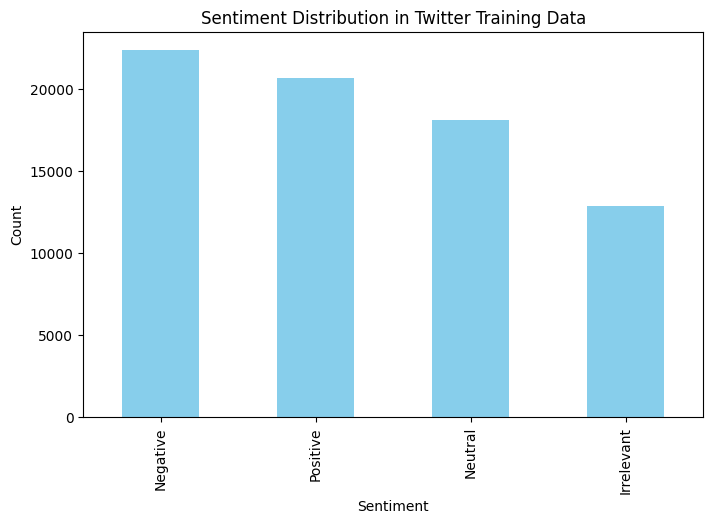

In [50]:
#visualise the sentiment distribution
plt.figure(figsize=(8,5))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution in Twitter Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [45]:
twitter_training['Words'] = twitter_training['Cleaned_Text'].str.split()
twitter_training

,ID,Topic,Sentiment,Text,Cleaned_Text,Words,Cleaning_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m...",im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will...",i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k...",im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...",im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m...",im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition...",just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit...",just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ...",just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...,"[just, realized, between, the, windows, partit...",just realized between the windows partition of...


In [53]:
del twitter_training['Cleaning_Text']
print(twitter_training)

         ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
74678  Just realized that my Mac window partition is ...   
746

In [54]:
twitter_training.info()
twitter_training

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            73996 non-null  int64 
 1   Topic         73996 non-null  object
 2   Sentiment     73996 non-null  object
 3   Text          73996 non-null  object
 4   Cleaned_Text  73996 non-null  object
 5   Words         73996 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.0+ MB


,ID,Topic,Sentiment,Text,Cleaned_Text,Words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m..."
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition..."
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit..."
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ..."
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...,"[just, realized, between, the, windows, partit..."


In [60]:
words_df = twitter_training.explode('Words')
words_df

,ID,Topic,Sentiment,Text,Cleaned_Text,Words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,getting
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,on
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,borderlands
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,and
...,...,...,...,...,...,...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,idea
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,how
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,i
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,didnt


In [61]:
words_df = words_df[words_df['Words'] != '']
words_df

,ID,Topic,Sentiment,Text,Cleaned_Text,Words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,getting
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,on
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,borderlands
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,and
...,...,...,...,...,...,...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,idea
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,how
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,i
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,didnt


In [62]:
#Analyze most common words by sentiment
positive_words = words_df[words_df['Sentiment'] == 'Positive']['Words'].value_counts().head(10)
negative_words = words_df[words_df['Sentiment'] == 'Negative']['Words'].value_counts().head(10)
neutral_words = words_df[words_df['Sentiment'] =='Negative']['Words'].value_counts().head(10)



In [63]:
print("Most common words in positive sentiment:\n",positive_words)
print("Most common words in negative sentiment:\n",negative_words)
print("Most common words in neutral sentiment:\n",neutral_words)

Most common words in positive sentiment:
 Words
the     11804
i        9115
to       7665
and      6909
a        5935
of       5113
is       4500
for      4379
this     4255
it       4015
Name: count, dtype: int64
Most common words in negative sentiment:
 Words
the     14017
i       10101
to       9082
and      8630
a        7490
is       6823
of       5746
this     4909
it       4782
in       4781
Name: count, dtype: int64
Most common words in neutral sentiment:
 Words
the     14017
i       10101
to       9082
and      8630
a        7490
is       6823
of       5746
this     4909
it       4782
in       4781
Name: count, dtype: int64


In [68]:
topic_sentiment_distribution =twitter_training.groupby(['Topic','Sentiment']).size().unstack().fillna(0)
topic_sentiment_distribution

Sentiment,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,186,575,1207,308
ApexLegends,192,591,936,634
AssassinsCreed,264,375,156,1439
Battlefield,915,464,351,586
Borderlands,240,426,597,1017
CS-GO,632,344,548,760
CallOfDuty,672,883,375,446
CallOfDutyBlackopsColdWar,569,566,352,856
Cyberpunk2077,465,385,462,950


NameError: name 'pt' is not defined

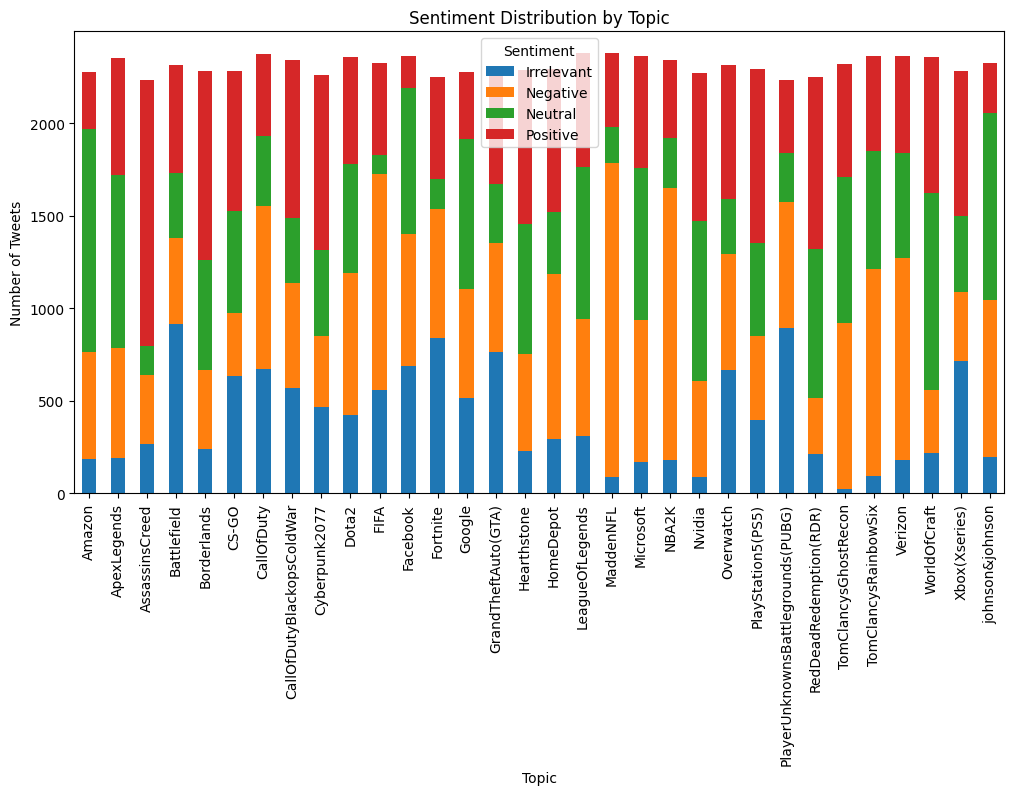

In [69]:
topic_sentiment_distribution.plot(kind='bar',stacked=True, figsize=(12,6))
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
pt.show()

# Based on this, AssassinsCreed and Borderlands have the highest positive sentiments,indicating strong user approval.
# MaddenNFL and NBA2K show negative sentiment, suggesting area of user dissatisfaction.
# Fortnite and Battlefield have enough irrevelant sentiment,possibly indicating off topic discussion.
# Microsoft and Google have balanced distribution with higher neutral sentiment,reflecting a more mixed user perspective.
# Some brands need to concentrate on negative approach of people for changng public opinions about them.